In [124]:
import scipy.io as sio
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt

In [125]:
def butter_pass(cutoff, fs, order=5, passtype='low'): # две эти функции были найдены как решение задачи фильтрации сигнала
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype=passtype, analog=False)
    return b, a

def butter_pass_filter(data, cutoff, fs, order=5, passtype='low'):
    b, a = butter_pass(cutoff, fs, order=order, passtype=passtype)
    y = signal.lfilter(b, a, data)
    return y

def mean_std_depend_on_time(time, sign, fs,time_window):  #набираем массивы средних и средних отклонений по окнам
    dots_in_window=int(time_window*fs)
    total_dots=len(time)
    upper_side_of_window=dots_in_window
    std_dev=[]
    mean_value=[]
    stdtime=[]
    while (upper_side_of_window <= total_dots):
        mean_value.append(np.mean(sign[upper_side_of_window-dots_in_window:upper_side_of_window]))
        std_dev.append(np.std(sign[upper_side_of_window-dots_in_window:upper_side_of_window]))
        stdtime.append(time[upper_side_of_window-dots_in_window])
        upper_side_of_window+=dots_in_window  
    return  std_dev, mean_value, stdtime

In [126]:
filename=input() #вводим название файла

33484K-LFS


In [127]:
spec=sio.loadmat(filename + '.mat') #считываем

In [128]:
spec #смотрим, как выглядит в питоне для понимания, что именно считывать

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Jun  8 16:19:28 2017',
 '__version__': '1.0',
 '__globals__': [],
 'sigKL': array([[-0.0042699 ],
        [-0.00671146],
        [-0.00793223],
        ...,
        [ 0.01892488],
        [ 0.02014566],
        [ 0.01892488]]),
 'tbKL': array([[-0.1053137, -0.1053132, -0.1053127, ...,  7.8946953,  7.8946958,
          7.8946963]])}

In [129]:
timename='tbKL'  #обозначаем, что хотим считывать
signame='sigKL'

In [130]:
fs=1/(spec[timename][0][1]-spec[timename][0][0])  # определяем частоту дискретизации
time=spec[timename][0]   # создаем массив для времени

In [131]:
fs=round(fs)  # округляем частоту дискретизации
order = 5 #определяем порядок фильтра

In [132]:
sign=spec[signame].transpose()[0]  # переворачиваем массив сигналов

In [133]:
plt.rcParams['agg.path.chunksize'] = 10000

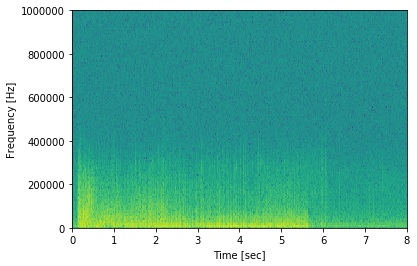

In [134]:
f,  t,Sxx = signal.spectrogram(sign, fs)   #получаем исходную спектрограмму
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.savefig(filename+'/raw_spectrogram')
plt.show()

In [135]:
time_window=0.005 #устанавливаем желаемое временное окно для считывания


In [136]:
std_dev, mean_value, stdtime = mean_std_depend_on_time(time, sign, fs, time_window) #считываем массивы для зависимости средних и отклонений от времени

max(t)

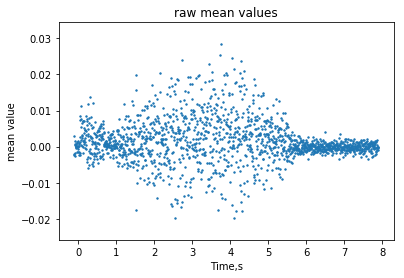

In [137]:
fig, ax =plt.subplots() #строим зависимость средних от времени
plt.title('raw mean values') 
ax.scatter(stdtime, mean_value, s=2)
plt.xlabel('Time,s')
plt.ylabel('mean value')
plt.savefig(filename+'/raw_mean')
plt.show()

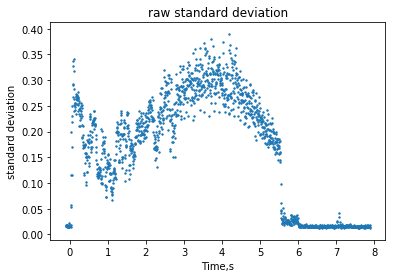

In [138]:
fig, ax =plt.subplots() #строим зависимость отклонений от времени
plt.title('raw standard deviation')
ax.scatter(stdtime, std_dev, s=2)
plt.xlabel('Time,s')
plt.ylabel('standard deviation')
plt.savefig(filename+'/raw_std')
plt.show()

In [139]:
cutoff=3e5 #определяем частоту, по котороем будем фильтровать

In [140]:

sign_lowpassed = butter_pass_filter(sign, cutoff, fs, order) #оставляем то, что ниже определенной частоты

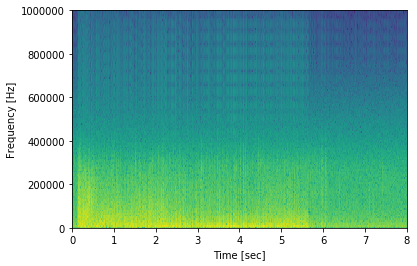

In [141]:
f,  t,Sxx = signal.spectrogram(sign_lowpassed, fs)   #получаем отфильтрованную вниз спекротграмму
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.savefig(filename+'/lowspectrogram')
plt.show()

In [142]:
std_dev, mean_value, stdtime = mean_std_depend_on_time(time, sign_lowpassed, fs, time_window) #считываем массивы для зависимости средних и отклонений от времени из отфильтрованного

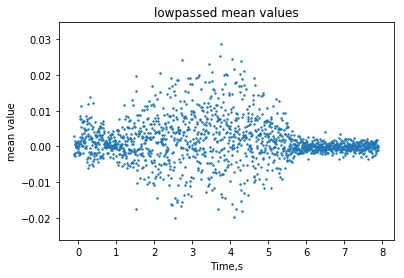

In [143]:
fig, ax =plt.subplots() #строим зависимость средних отфильтрованного вниз от времени
plt.title('lowpassed mean values')
ax.scatter(stdtime, mean_value, s=2)
plt.xlabel('Time,s')
plt.ylabel('mean value')
plt.savefig(filename+'/lowpassed_mean')
plt.show()

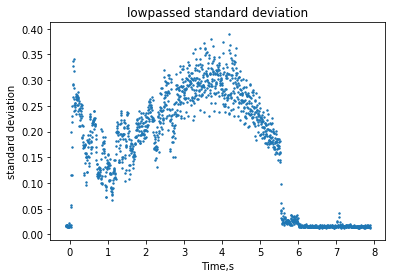

In [144]:
fig, ax =plt.subplots() #строим зависимость отклонений отфильтрованного вниз от времени
plt.title('lowpassed standard deviation')
ax.scatter(stdtime, std_dev, s=2)
plt.xlabel('Time,s')
plt.ylabel('standard deviation')
plt.savefig(filename+'/lowpassed_std')
plt.show()

In [145]:
sign_allpassed = butter_pass_filter(sign_lowpassed, 5e3, fs, order, passtype='highpass') #отсекаем нижние частоты

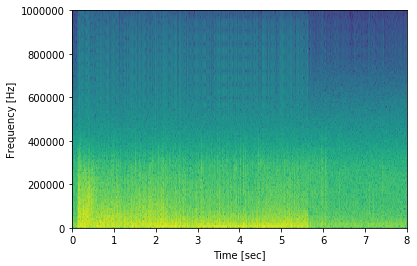

In [146]:
f,  t,Sxx = signal.spectrogram(sign_allpassed, fs)   #получаем итоговую спектрограмму
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.savefig(filename+'/highspectrogram')
plt.show()

In [147]:
std_dev, mean_value, stdtime = mean_std_depend_on_time(time, sign_allpassed, fs, time_window) #собираем массивы средних и отклоенний по полностью отфильтрованным

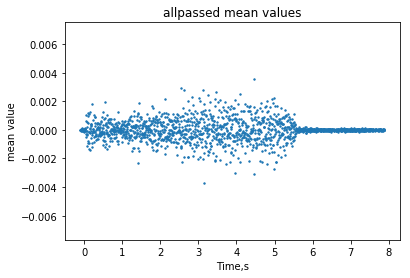

In [148]:
fig, ax =plt.subplots()   #строим зависимость средних отфильтрованного  от времени
plt.title('allpassed mean values')
ax.scatter(stdtime, mean_value, s=2)
plt.xlabel('Time,s')
plt.ylabel('mean value')
plt.savefig(filename+'/allpassed_mean')
plt.show()

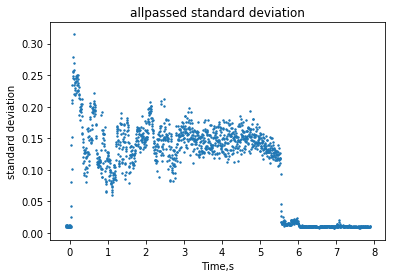

In [149]:
fig, ax =plt.subplots()  #строим зависимость отклонений отфильтрованного от времени
plt.title('allpassed standard deviation')
ax.scatter(stdtime, std_dev, s=2)
plt.xlabel('Time,s')
plt.ylabel('standard deviation')
plt.savefig(filename+'/allpassed_std')
plt.show()